# Visualizing categorical data. catplot()

In [2]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Table of contents

[1. Introduction](#intro)
<br>

[2. Catplot](#cat)
<br>

- [categorical scatterplot](#scatter)

    - [stripplot](#strip)
    
    - [swarmplot](#swarm)
<br>

- [categorical distribution plots](#dist)

    - [boxplot](#box)
    
    - [violinplot](#violin)
<br>

- [categorical estimate plots](#estimate)

    - [pointplot](#point)
    
    - [countplot](#count)
    
    - [barplot](#bar)
    

## <a id ='intro'>Introduction</a>
We've seen so far the `flf` (figure-level functions) and `alf`(axis-level functions). And that `FacetGrid` (a `flf`) was like the *father* of the next `flf`s: `relplot()`, `displot()` and `catplot()`. We can see the *function tree* in the next image:

<br><br>

<div>
    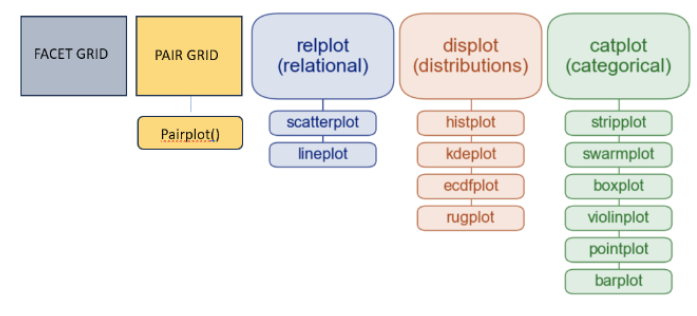
</div>


In this notebook we are going to see is more depth the `catplot` family. 

It is not a coincidence that they are separated in that way. Each `flf` family is meant for a specific purpose, different from the rest of the families.


- `relplot` *family* is meant for **visualizing statistical relationships**. This can be done with the `alf`: `scatterplot` and `lineplot`.


- `displot` *family* is meant for **visualizing distributions of data**. This can be done with the `alf`: `histplot`, `kdeplot`, `ecdfplot` and `rugplot`. 


- `catplot` *family* is meant for **visualizing categorical data**. This can be done with the `alf`: `stripplot`, `swarmplot`, `boxplot`, `violinplot`, `pointplot` and `barplot`. 

<br><br>

In this notebook we'll be focusing on the `catplot` family.

## <a id ='cat'>Catplot</a>

With `catplot` we can use `stripplot`, `swarmplot`, `boxplot`,  `violinplot` `pointplot`, `boxenplot`, `countplot` & `barplot`.

These plots can be divided into:

### categorical scatterplots
- `stripplot`
- `swarmplot`

### categorical distribution plots
Used to compare distributions
- `boxplot`
- `violinplot`
- `boxenplot`

### Categorical estimate plots
Used for central tendency estimation
- `pointplot`
- `countplot`
- `barplot`

>As I said in the *0.Seaborn_intro*, it is a good practice to use the `flf`(**displot**) to plot an `alf` (**histplot, kdeflot and ecdfplot**) instead of using the `alf` directly and I justified why. <br><br>
That's why in this noteebook, you will see `sns.histplot()`,  `sns.kdeplot()`,  `ecdfplot()`, only  when needed (i.e different subplots need)


In [3]:
sns.set_theme(style = 'whitegrid')
titanic = sns.load_dataset("titanic")
titanic.head(6)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True


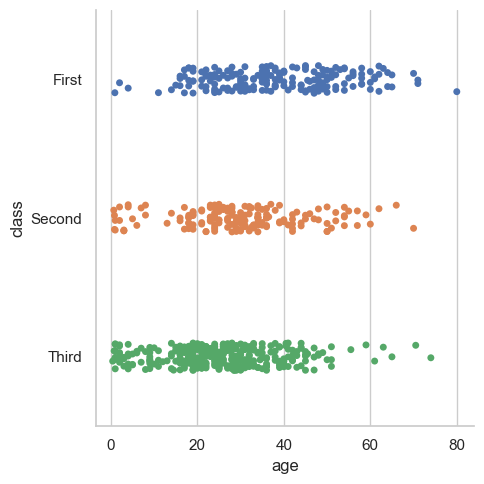

In [3]:
# stripplot
sns.catplot(data=titanic, x="age", y="class", kind = 'strip')

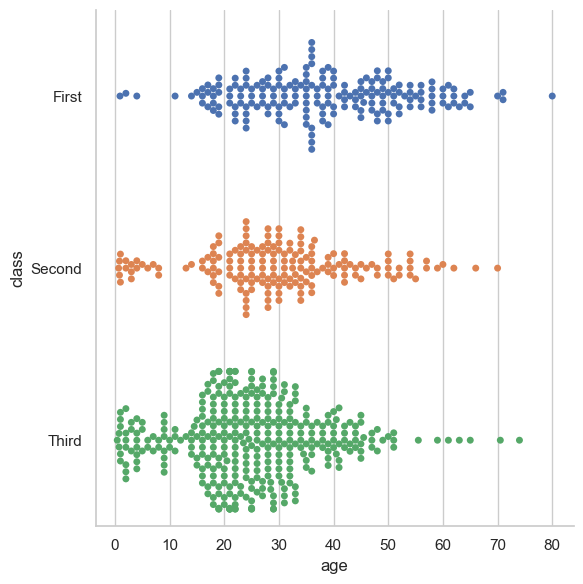

In [4]:
# swarmplot
sns.catplot(data=titanic, x="age", y="class", kind = 'swarm', height = 6)

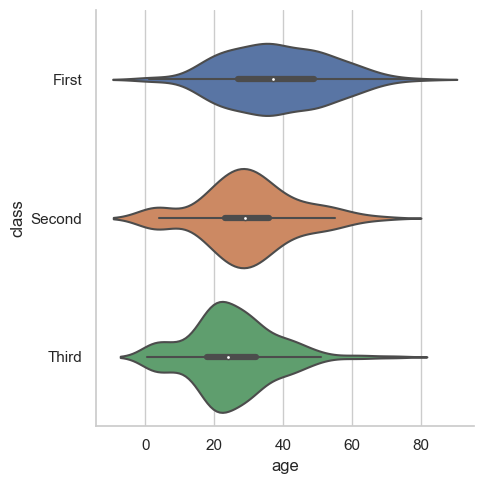

In [5]:
# violinplot
sns.catplot(data=titanic, x="age", y="class", kind="violin")

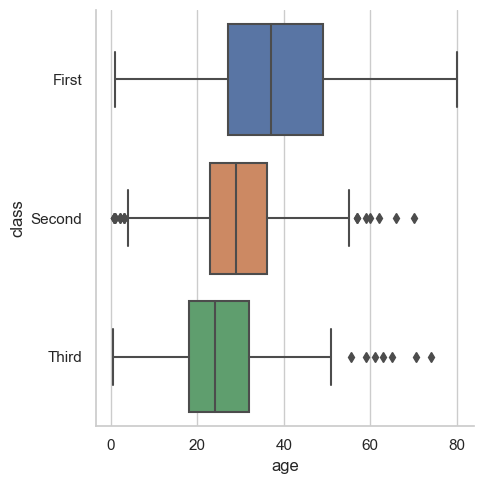

In [6]:
# boxplot
sns.catplot(data=titanic, x="age", y="class", kind="box")

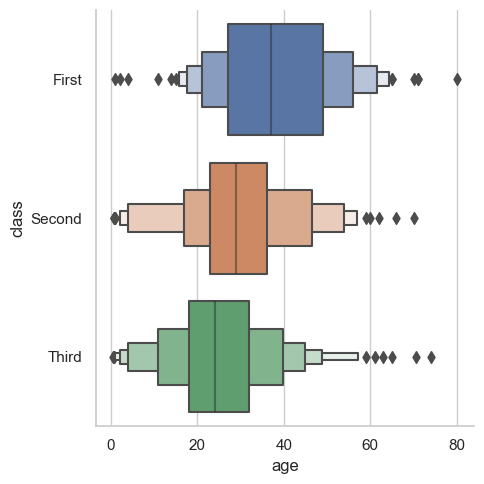

In [7]:
# boxenplot
sns.catplot(data=titanic, x="age", y="class", kind="boxen")

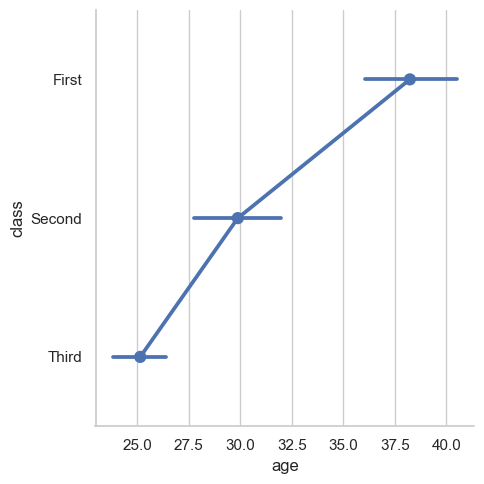

In [8]:
# pointplot
sns.catplot(data=titanic, x="age", y="class", kind="point")

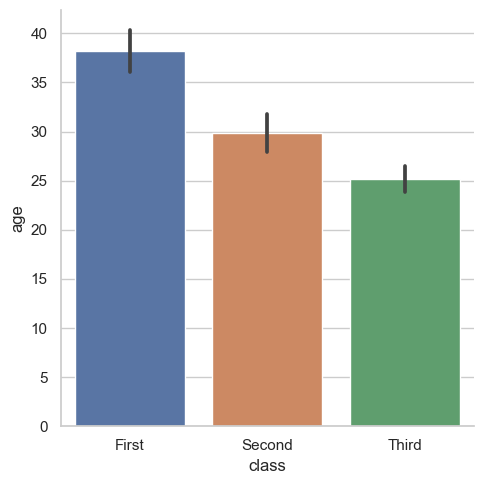

In [9]:
# barplot
sns.catplot(data=titanic, x="class", y="age", kind="bar")

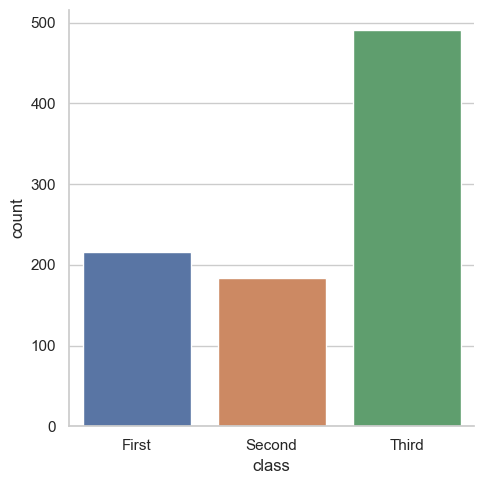

In [10]:
# countplot
sns.catplot(data=titanic, x="class", kind="count")

## <a id ='scatter'>categorical scatterplots</a>

The default representation of the data in `catplot()` uses a **scatterplot**. There are actually two different categorical scatter plots in seaborn. They take different approaches to resolving the main challenge in representing categorical data with a scatter plot, which is that all of the points belonging to one category would fall on the same position along the axis corresponding to the categorical variable.

### <a id ='strip'>stripplot</a>

This plot gives substancial information about the amount of observations of a categorical data with respect another variable. 

- It is a good complement to a `boxplot` or a `violinplot`.
- It's similar to the `rugplot()` function in the `displot` family.

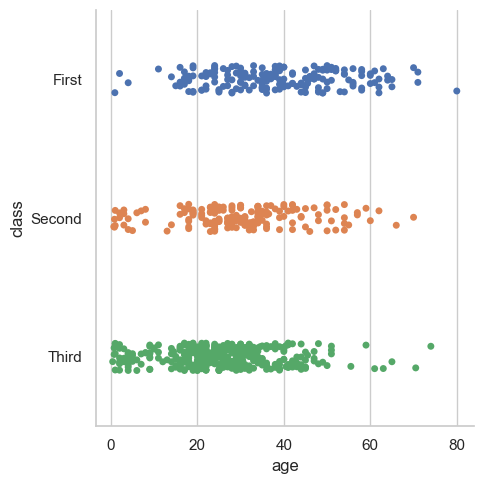

In [11]:
sns.catplot(data=titanic, x="age", y="class")

You can switch the `x` and `y` variables to show the plot vertically instead of horizontally.

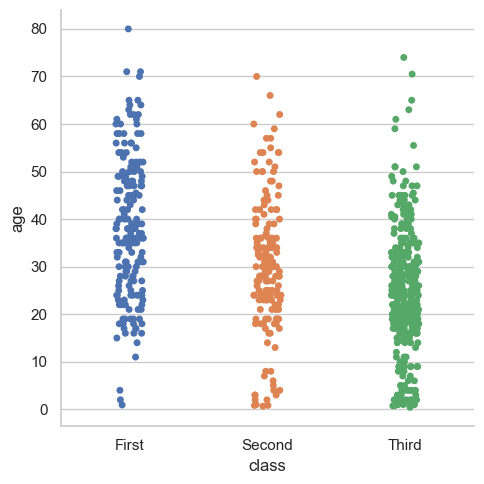

In [12]:
sns.catplot(data=titanic, x="class", y="age")

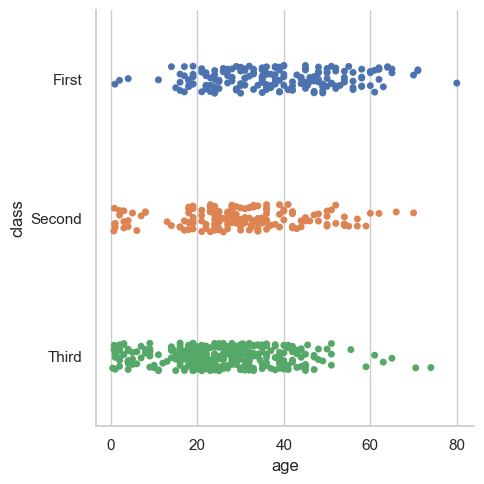

In [13]:
sns.catplot(data=titanic, x="age", y="class", dodge = True)

One issue that this plot has, is that since a lot of points overlap, sometimes it is really hard to tell how the data is really distributed. 

For example, in the above plot; is more number of people around their 20's or their 30's in the **third class**? 
- It is really hard to tell since there are enough people whose age is around *20* and *30* in the **third** class, so that the dots overlap and we can't really tell the difference.

### <a id ='swarm'>swarmplot</a>
This plot solves the problem we just mentioned. 
- It does it by placing points with the same value on top of each other so that they do not overlap. 

It is also a very good complement to a `boxplot` or a `violinplot`.

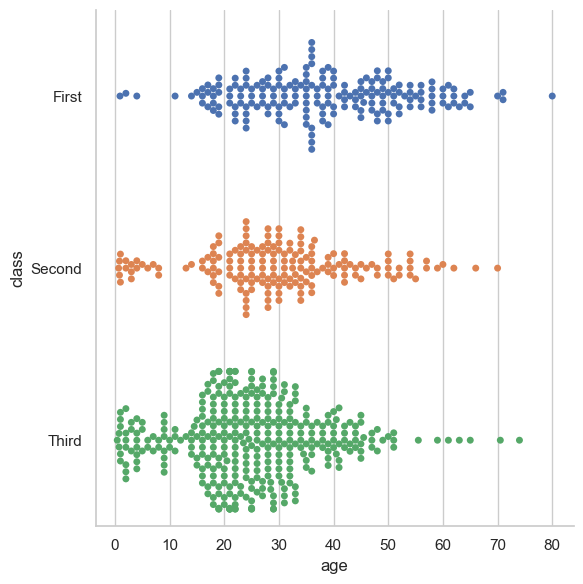

In [14]:
sns.catplot(data=titanic, x="age", y="class", kind = 'swarm',
            height = 6)

Now we can see that there are a few more people in **third class** around their *20's* than they are around their *30's*.

Like we did with the `stripplot`, we can also plot the `swarmplot` vertically if we see the data better this way.

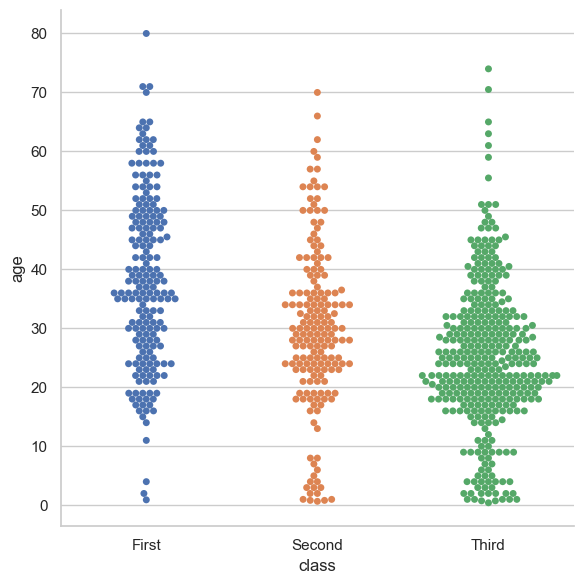

In [15]:
sns.catplot(data=titanic, x="class", y="age", kind = 'swarm',
            height = 6)

There is still a problem with this plot. Imagine we had much more data. The `swarmplot` would be too high (or wide if we are plotting vertically). The graph wouldn't fit the plot.

That's what takes us to the next plots

## <a id ='dist'>categorical distribution plots</a>
Let's say these plots we are about to see are a little bit better than the ones have just seen when handling severe amount of data.

These plots also offer extra information such as the mean, percentiles, quartiles, outliers...

That's why `stripplot` and `swarmplot` are considered complements of these, although, in some situations might be more than enough.

>**Note**: As said before, the goal using these plots is to compare distributions.

### <a id ='box'>boxplot</a>

This kind of plot *shows* the **three quartile** values of the distribution along with **outliers**. The “whiskers” extend to points that lie within **1.5 IQRs** of the lower and upper quartile, and then observations that fall outside this range (=*outliers*) are displayed independently.

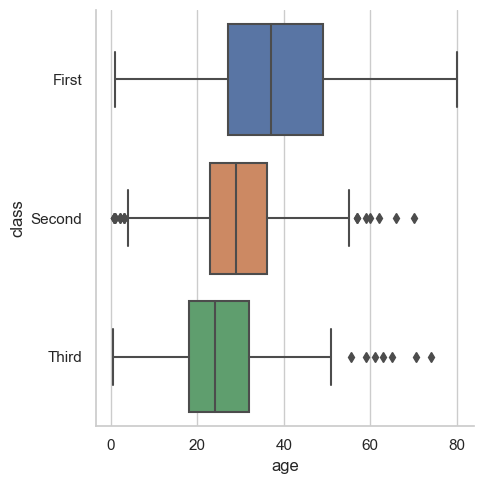

In [16]:
sns.catplot(data=titanic, x="age", y="class", kind="box")

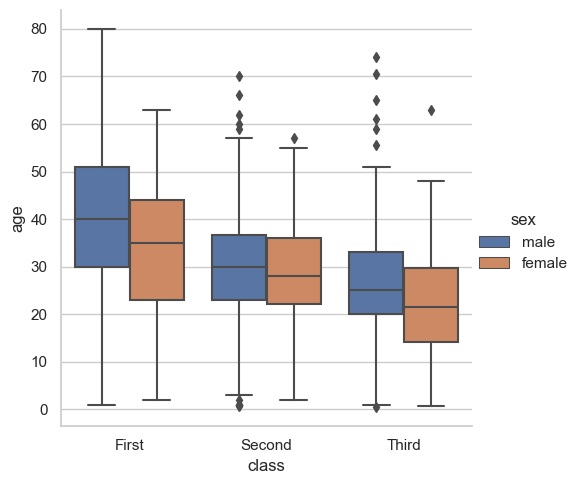

In [17]:
sns.catplot(data=titanic, x="class", y="age", hue = 'sex', kind="box")

#### fliersize
Size of the markers used to indicate outlier observations.

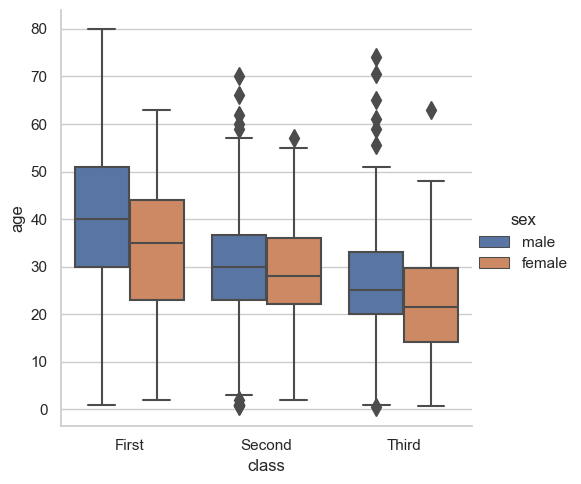

In [18]:
sns.catplot(data=titanic, x="class", y="age", hue = 'sex', 
            kind="box", fliersize = 9)

#### whis
Paramater that controls whisker length. 
- If **scalar**, whiskers are drawn to the furthest datapoint within `whis` * IQR from the nearest hinge. 


- If a **tuple**, it is interpreted as *percentiles* that whiskers represent. (the important one)

Text(0.5, 0.98, 'whis')

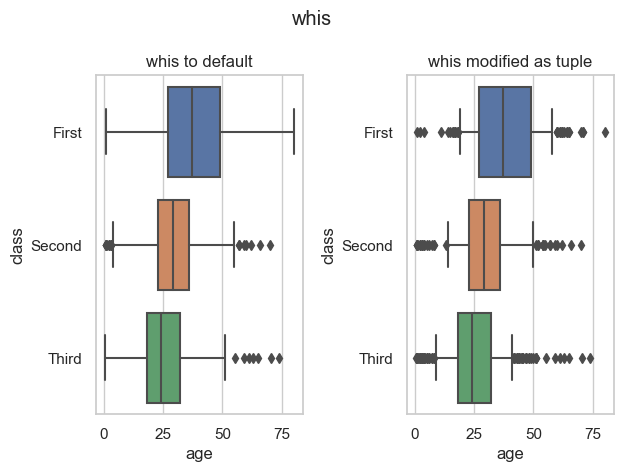

In [19]:
fig,ax = plt.subplots(1,2, layout = 'tight')

#whis to default
sns.boxplot(data=titanic, x="age", y="class", ax = ax[0])
ax[0].set_title('whis to default')

# whis modified as tuple
sns.boxplot(data=titanic, x="age", y="class",
             whis = (10, 90), ax = ax[1])
ax[1].set_title('whis modified as tuple')

fig.suptitle('whis')

#### boxprops & fill
`boolean` attribute.
- `True` by default.

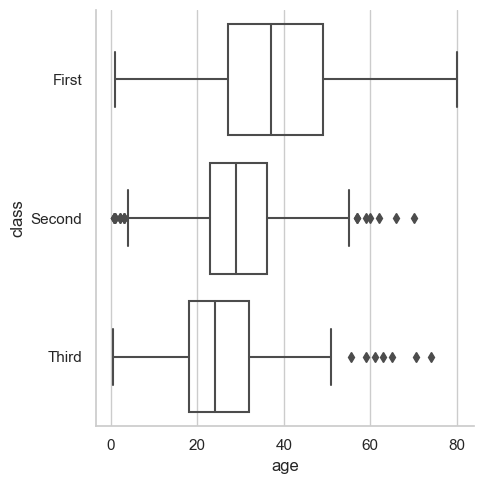

In [20]:
sns.catplot(data=titanic, x="age", y="class", kind="box", boxprops={"fill": None})

plt.show()

>**Note**: Not sure if in newer *Seaborn* versions, the `boxprops_kws` content can be pass as normal attributes and *Seaborn* manages it behind scenes.

### <a id ='violin'>violinplot</a>
It's the perfect complement of the `swarmplot` (and perfect substitue if we have large amounts of data). Once you see both plots together, you'll understand why.

Text(0.5, 0.98, 'Both (almost) the same')

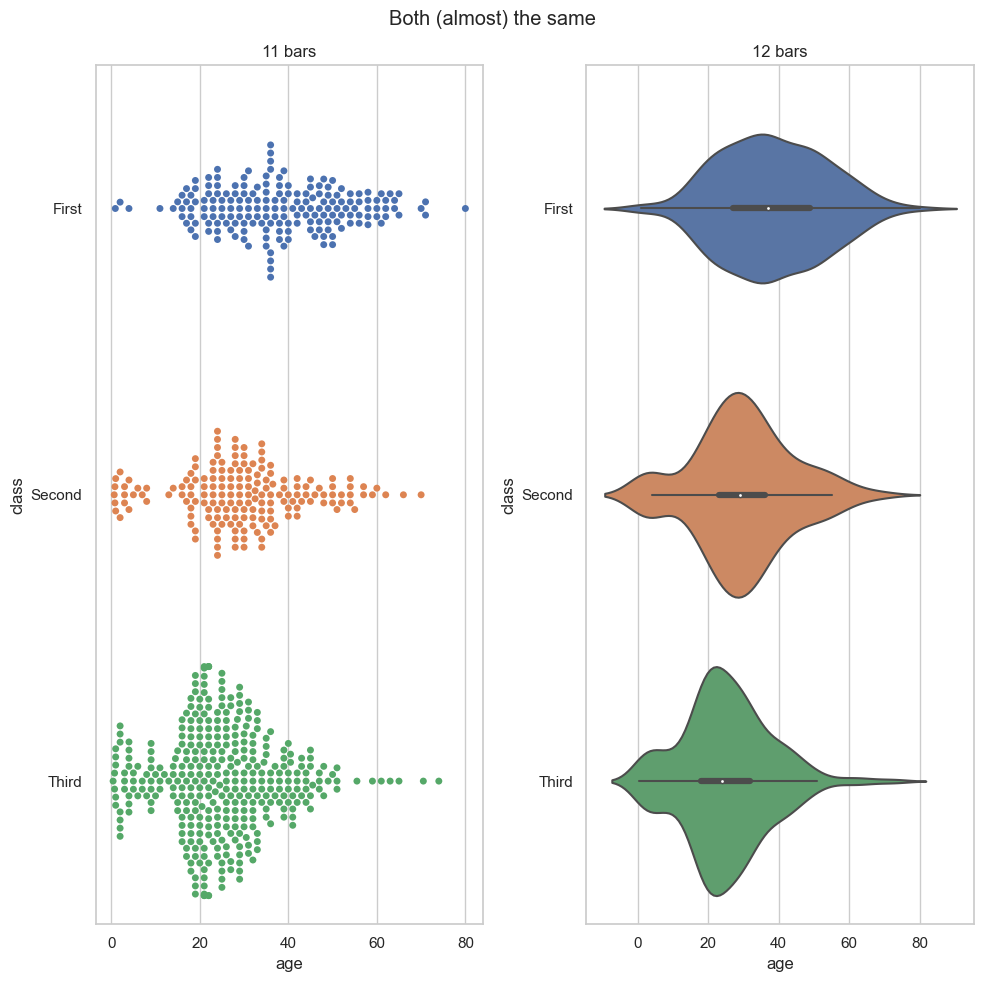

In [21]:
fig,ax = plt.subplots(1,2, layout = 'tight', figsize = (10,10))

sns.swarmplot(data=titanic, x="age", y="class", ax = ax[0])
ax[0].set_title('11 bars')

sns.violinplot(data=titanic, x="age", y="class", ax = ax[1])
ax[1].set_title('12 bars')

fig.suptitle('Both (almost) the same')

#### inner 
You  can  modify the violin's interior with `inner` attribute. Possible values are:
- **box** (default): draw a miniature box-and-whisker plot
- **quart**: show the quartiles of the data
- **point**: show each data observation
- **stick**: show each data observation

Text(0.5, 0.98, 'inner`s values')

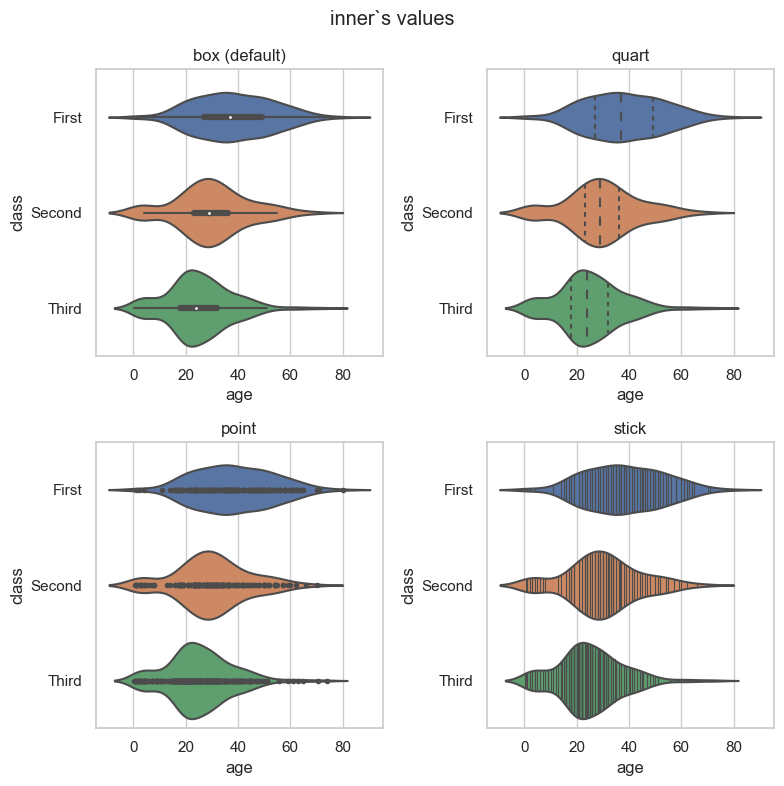

In [22]:
fig,ax = plt.subplots(2,2, layout = 'tight', figsize = (8,8))

# box (default) 
sns.violinplot(data=titanic, x="age", y="class",
               inner = 'box', ax = ax[0,0])
ax[0,0].set_title('box (default)')

# quart
sns.violinplot(data=titanic, x="age", y="class",
               inner = 'quart', ax = ax[0,1])
ax[0,1].set_title('quart')

# point
sns.violinplot(data=titanic, x="age", y="class",
               inner = 'point', ax = ax[1,0])
ax[1,0].set_title('point')

# stick
sns.violinplot(data=titanic, x="age", y="class",
               inner = 'stick', ax = ax[1,1])
ax[1,1].set_title('stick')

fig.suptitle('inner`s values')

I feel the `inner = point` can't be appreciated really well...

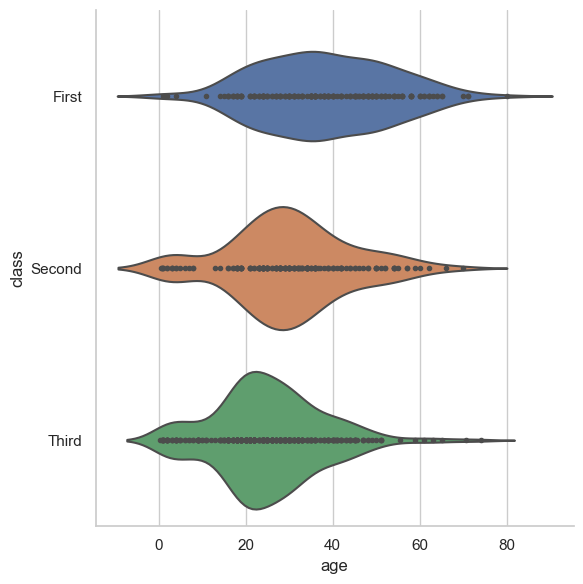

In [23]:
sns.catplot(data=titanic, x="age", y="class", kind="violin", 
            inner = 'points', height = 6)

I want to stop at the `inner = 'stick'` attribute. I consider it a very good way to show each individual observation instead of the summary boxplot values.

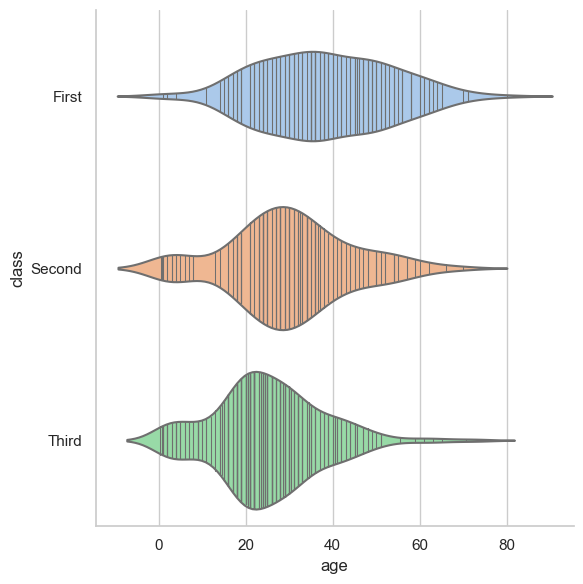

In [24]:
sns.catplot(data=titanic, x="age", y="class", kind="violin", 
            inner = 'stick',  palette = 'pastel', height = 6)

Finally, you can set `inner = None` and nothing will be shown in the violin's interior

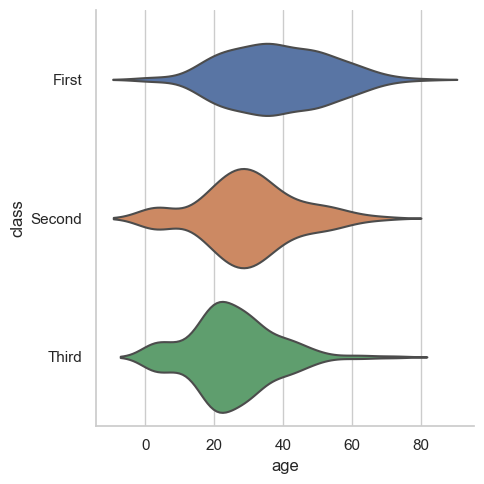

In [25]:
sns.catplot(data=titanic, x="age", y="class", kind="violin", 
            inner = None)

#### violinplot + swarmplot
You can use `violinplot` with either `swarmplot` or `stripplot` at  the same time. 

I personally do like the combination `violinplot = swarmplot` a little  bit more

<AxesSubplot:xlabel='age', ylabel='class'>

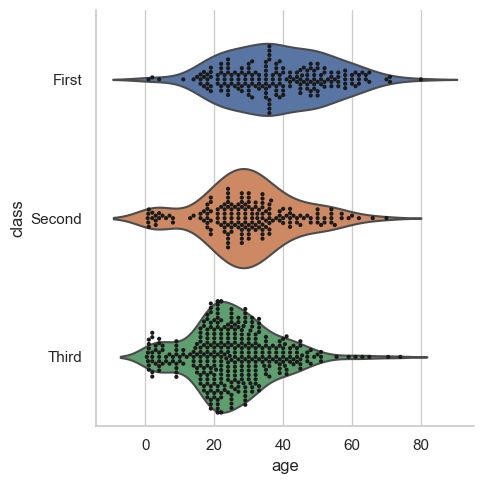

In [9]:
g = sns.catplot(data=titanic, x="age", y="class", kind="violin", inner=None)
sns.swarmplot(data=titanic, x="age", y="class", color="k", size=3, ax=g.ax)

#### violinplot + stripplot

<AxesSubplot:xlabel='age', ylabel='class'>

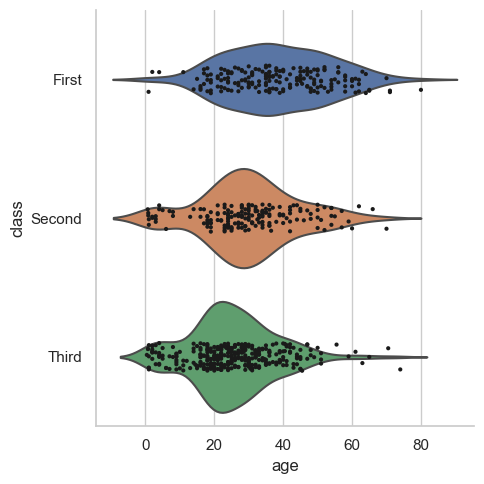

In [27]:
g = sns.catplot(data=titanic, x="age", y="class", kind="violin", inner=None)
sns.stripplot(data=titanic, x="age", y="class", color="k", size=3, ax=g.ax)

####  hue

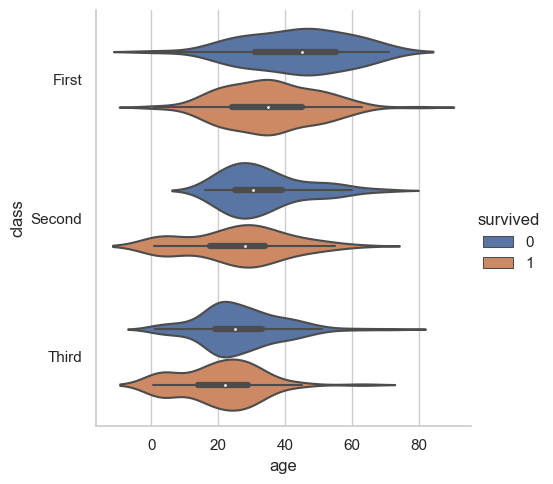

In [6]:
sns.catplot(data=titanic, x="age", y="class", kind="violin", hue='survived')

#### split
Show an un-mirrored distribution, alternating sides when using hue.

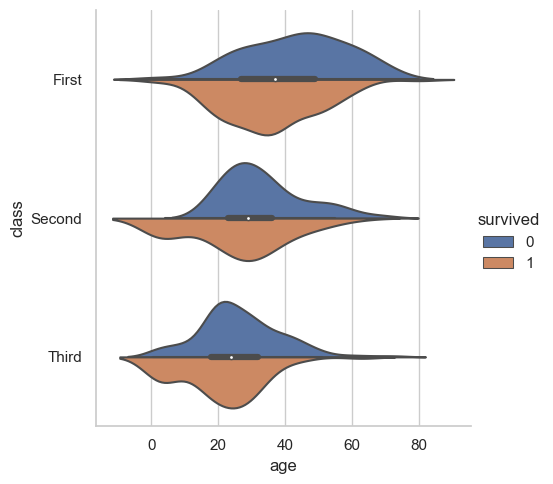

In [29]:
sns.catplot(data=titanic, x="age", y="class", kind="violin", 
            hue='survived', split=True)

## <a id ='estimate'>Categorical estimate plots</a>

Maybe, rather than showing a distribution, you might want to show an estimate of the central tendency of the values.

### <a id ='point'>pointplot</a>
I am gonna leave [here](https://seaborn.pydata.org/generated/seaborn.pointplot.html) the documentation. Since I don't see why I would use this plot to show my data; therefore I'm not gonna explain it. 

### <a id ='count'>countplot</a>
This is a very simple plot. Probably the simplest at the moment. It shows the counts of observations in each categorical bin using bars.

I am not sure, but I think it only accepts one variable as an input, since the other variable that is going to be plotted is going to be `count` (usually in the *y_axis*).

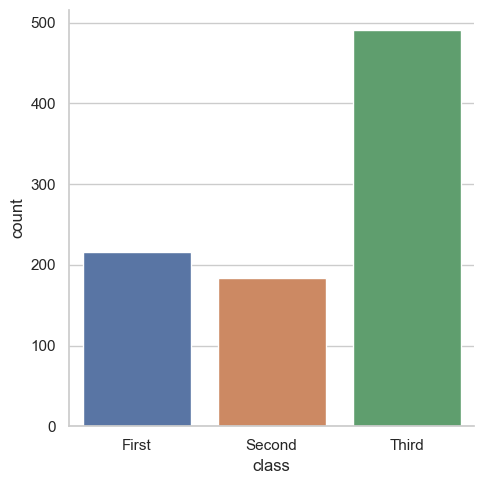

In [30]:
sns.catplot(data = titanic, x="class", kind = 'count')

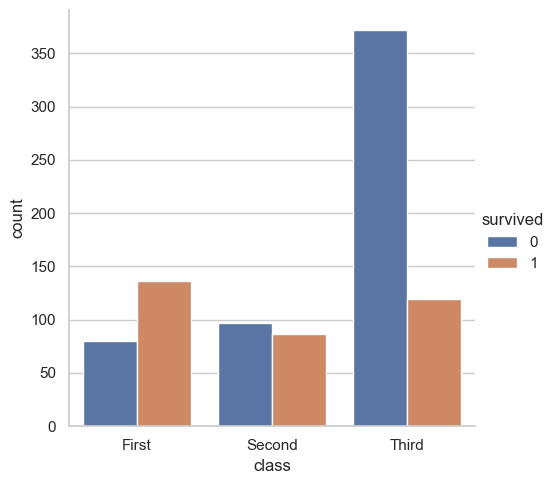

In [31]:
sns.catplot(data = titanic, x ="class", hue ="survived", kind = 'count')

<br><br>
If the variable we pass, we do it through the `x` method, then a vertical `countplot` will be plotted. On the other hand, if we pass our variable through the `y` argumen, an horizontal `countplot` will be plotted.

<br><br>

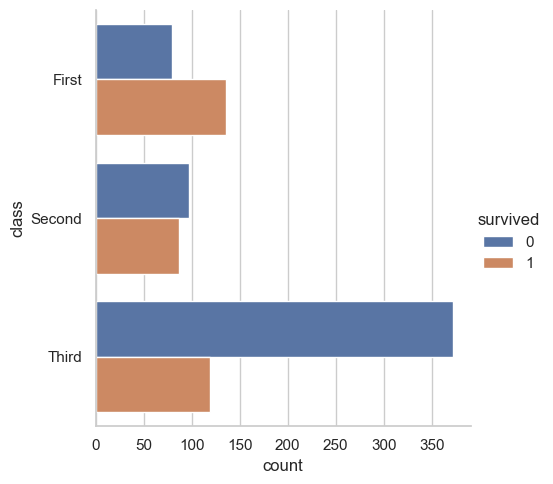

In [32]:
sns.catplot(data = titanic, y ="class", hue ="survived", kind = 'count')

### <a id ='bar'>barplot</a>

`barplot` is the same as `countplot` but passing two variables. `countplot` receives **one** variable that will be plotted along with the `counts` of each variable.

`barplot` receives two variables: one in the *x_axis* and the other one in the *y_axis*. Then plots the **mean** of  the `x` variable with respect to the `y` variable.

In other words, 

- `countplot` plots *2* variables (the one we pass + **count**).
- `barplot` plots *3* variables (the two variables we pass in the *x_axis* and *y_axis* respectively + **mean** as the third variables).

>`barplot` represents an aggregate or statistical estimate for a numeric variable with the height of each rectangle and indicates the uncertainty around that estimate using an error bar.

>**Note**: Keep in mind that this is a `categorical function`. That means, that one of the variables we pass must be either **categorical or discrete** and the other variable must be **numeric**. But be careful, because if the former is a **discrete** variable and the latter a **continuous** variable, you are **not**  going to be able to plot a **horizontal plot**.

In [33]:
tips = sns.load_dataset("tips")
tips.head(6)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4


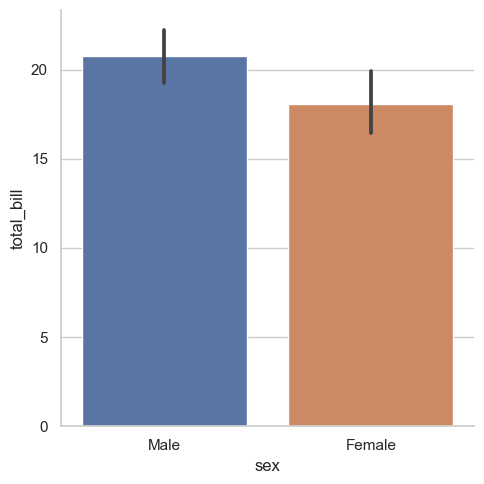

In [34]:
# passing a categorical(sex) + numeric(total_bill) variables
sns.catplot(data = tips, x="sex", y="total_bill", kind  ='bar')

In [35]:
# the mean values  correspond to the heigth of the bars
tips.groupby('sex')['total_bill'].mean().to_frame()

,total_bill
sex,
Male,20.744076
Female,18.056897


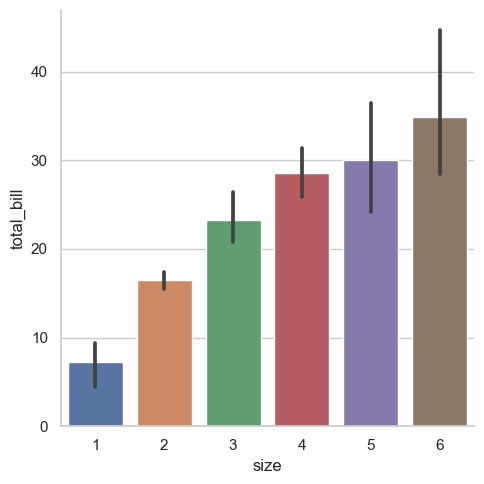

In [36]:
# passing a discrete(size) and a numeric(total_bill) variables
sns.catplot(data = tips, x="size", y="total_bill", kind  ='bar')

#### estimator
We've said that `sns.barplot` plots the mean of a certain variable (either categorical or discrete) with respect to other variable (numeric). 

But we can change this estimation with `estimator` with any other ***NumPy statistical functions*** like:
- np.sum
- np.max
- np.mean **(default)**
- np.median
- np.percentile

Text(0.5, 0.98, 'Estimator`s values')

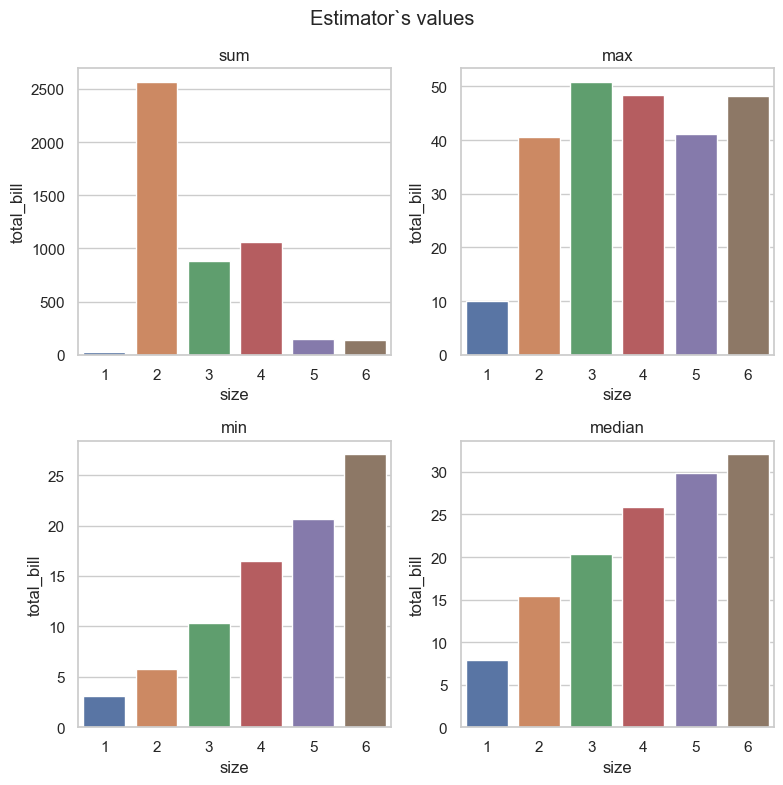

In [37]:
fig,ax = plt.subplots(2,2, layout = 'tight', figsize = (8,8))

# sum 
sns.barplot(data = tips, x="size", y="total_bill",
           estimator = np.sum, ci = False, ax = ax[0,0])
ax[0,0].set_title('sum')

# max
sns.barplot(data = tips, x="size", y="total_bill",
           estimator = np.max, ci = False, ax = ax[0,1])
ax[0,1].set_title('max')

# min
sns.barplot(data = tips, x="size", y="total_bill",
           estimator = np.min, ci = False,  ax = ax[1,0])
ax[1,0].set_title('min')

# median
sns.barplot(data = tips, x="size", y="total_bill",
           estimator = np.median, ci = False, ax = ax[1,1])
ax[1,1].set_title('median')

fig.suptitle('Estimator`s values')

#### ci / errorbar

Notice the error bar plotted along with the bars indicating the `ci` (confidenve interval) equal to *95* by default.
- In other words, indicating uncertainty in the `barplot` approximation. 


But  we could plot the `std` (another uncertainty measurement) instead, if we wanted to. 

Because remember what was said just a few cells before:

>`barplot` represents an aggregate or statistical estimate for a numeric variable with the height of **each rectangle and indicates the uncertainty around that estimate using an error bar**.
We could remove this bar in case we wanted to. `errorbar` is a `boolean` attribute whose default value is set to `True`.

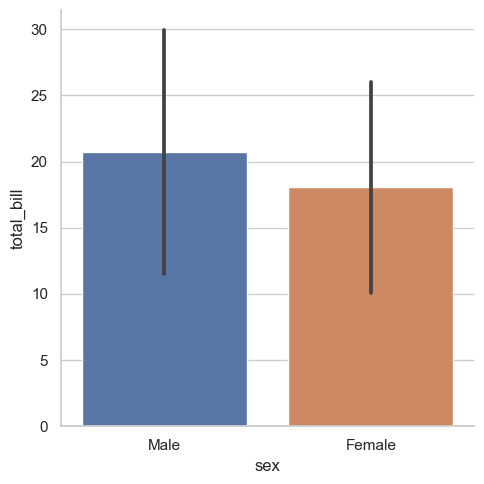

In [38]:
# plotting the standard deviation as the uncertainty
# measurement instead of the  ci
sns.catplot(data = tips, x="sex", y="total_bill", 
            ci = 'sd', kind  ='bar')

>**Note**: I use `ci = False` instead of `errorbar` because I have an old *Seaborn* version. In newer versions, `ci` is deprecated. Use `errorbar` instead.

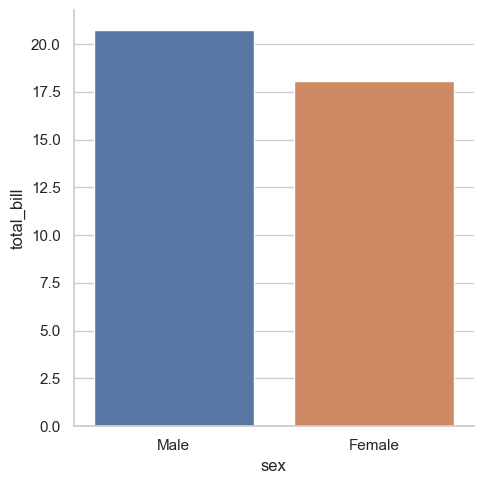

In [39]:
sns.catplot(data = tips, x="sex", y="total_bill", 
            ci = False, kind  ='bar')

#### horizontal plots

Only posible when the *y_axis* variable is **categorical and not numeric**. 

Recall an earlier **Note**:
>**Note**: Keep in mind that this a `categorical function`. That means, that one of the variables we pass must be either **categorical or discrete** and the other variable must be **numeric**. But be careful, because if the former is a **discrete** variable and the latter a **continuous** variable, you are **not**  going to be able to plot a **horizontal plot**.

Since always the *mean* calculated is going to be the mean of the **categorical** variable with respect to the **numeric** one, to plot a horizontal plot, simply switch the `x` and `y` variables

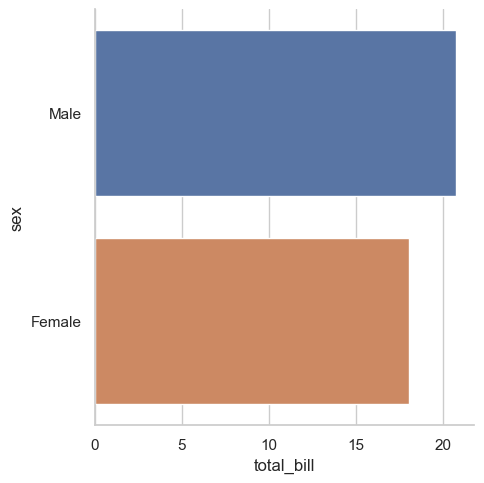

In [40]:
# categorical + numeric
sns.catplot(data = tips, x="total_bill", y="sex", 
            ci = False, kind  ='bar')

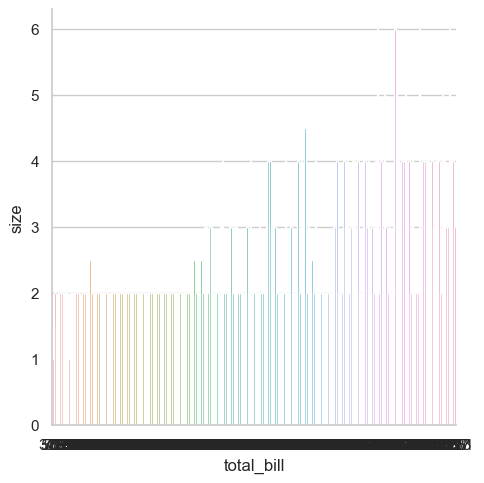

In [41]:
# discrete + numeric (nosense)
sns.catplot(data = tips, x="total_bill", y="size", 
            ci = False, kind  ='bar')

#### hue
You can add an extra variable to the plot by using `hue`.

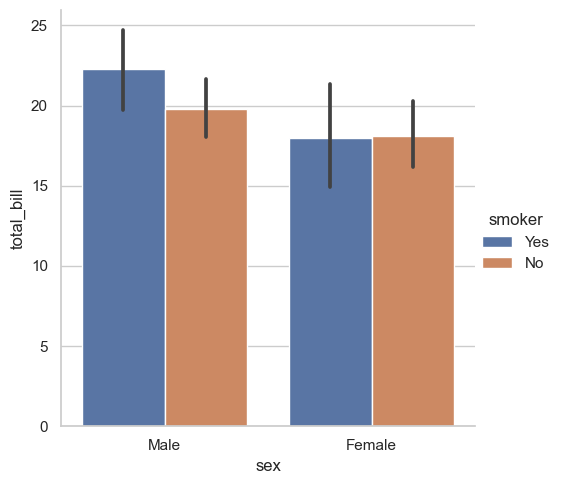

In [42]:
sns.catplot(data = tips, x="sex", y="total_bill", 
            hue = 'smoker', kind  ='bar')

In [43]:
tips.groupby(['sex', 'smoker'])['total_bill'].mean().to_frame()

total_bill
sex    smoker            
Male   Yes      22.284500
       No       19.791237
Female Yes      17.977879
       No       18.105185

#### fill & edgecolor
Since `fill = False` will plot nothing, an `edgecolor` will be neccessary to add.

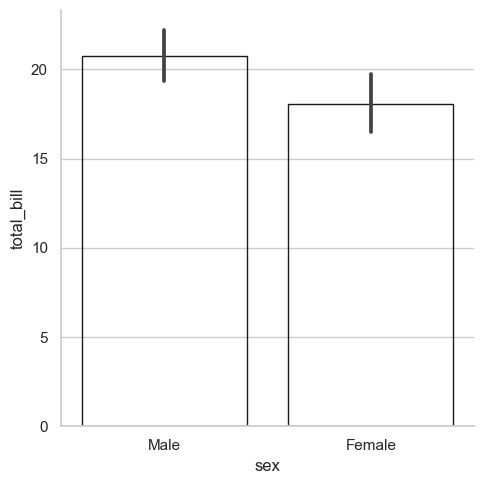

In [44]:
sns.catplot(data = tips, x="sex", y="total_bill", 
            kind  ='bar', edgecolor = 'k', fill = False)

In [45]:
fmri = sns.load_dataset("fmri")
fmri.head(6)

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
5,s9,18,stim,parietal,-0.103513


In [46]:
fmri.loc[fmri['subject'] == 's13']

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
15,s13,17,stim,parietal,-0.008265
29,s13,16,stim,parietal,-0.002856
43,s13,15,stim,parietal,-0.010971
57,s13,14,stim,parietal,-0.033713
...,...,...,...,...,...
995,s13,1,cue,frontal,-0.010346
1016,s13,9,cue,frontal,-0.082955
1029,s13,8,cue,frontal,-0.070991
1040,s13,12,cue,frontal,-0.020686


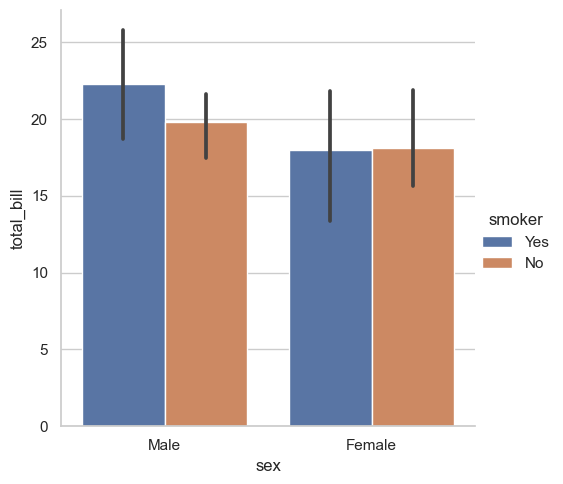

In [47]:
sns.catplot(data = tips, x="sex", y="total_bill", 
            hue = 'smoker', units = 'day', kind  ='bar')

#### labels
Like we saw in the *Matplotlib tutorial* you can add variables to the bars. Using labels may give you a quicker insight of some value of a certain variable. 

To achieve this, you must use `sns.barplot` directly, instead of `sns.catplot(kind = 'bar')`.

To set labels we'll use the *Matplotplib* function `bar_labels` we saw in the tutorial to achieve the same task.

> In my personal opinion, labels are a good reason to add them if you have an  standalone plot. So, if labels were needed, I would use the  *Matplotlib* `plt.barplot()` function instead of *Seaborn*.

[Text(0, 0, '50.81'), Text(0, 0, '44.3')]

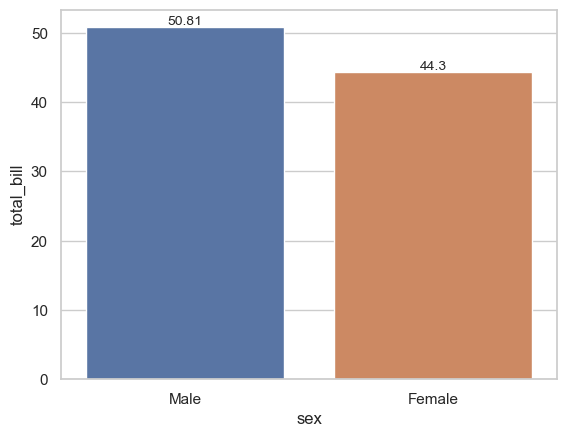

In [48]:
ax = sns.barplot(data = tips, x="sex", y="total_bill", 
                 estimator = np.max, ci =False)
ax.bar_label(ax.containers[0], fontsize=10)

<p style="text-align:center"><b>This notebook has been done by:</b></p>
<p style="text-align:center"><i>Javier Coque</i></p>
<p style="text-align:center"><i>University of U-tad: Double Degree in software engineering and computational mathematics</i></p>

LinkedIn: <a href="https://www.linkedin.com/in/javier-coque-92b934278/">Javier Coque</a>